In [9]:
import pandas as pd
from tensorflow.keras.models import load_model
model = load_model('my_somatotype.keras') # 모델 로드
file_name = 'somatotype_pred.csv' # 파일이름
data = pd.read_csv(file_name) # 데이터 로드
features = data[['gender', 'age', 'height', 'weight', 'fat_kg', 'mm_kg']]
# 고정된 평균과 표준편차 값 정의
fixed_mean = pd.Series([1.5, 45.0, 170, 70.0, 18.5, 48.0], 
            index=['gender', 'age', 'height', 'weight', 'fat_kg', 'mm_kg'])
fixed_std = pd.Series([0.5, 18.0, 9.0, 15.0, 8.0, 11.0], 
            index=['gender', 'age', 'height', 'weight', 'fat_kg', 'mm_kg'])
x_data = (features - fixed_mean) / fixed_std # 표준점수 계산 (표준화)
predictions = model.predict(x_data) # 예측 수행
# 예측 결과를 DataFrame으로 변환
predictions_df = pd.DataFrame(predictions, columns=['endo', 'meso', 'ecto'])
data[['endo', 'meso', 'ecto']] = predictions_df.round(2)
data.to_csv(file_name, index=False) # 결과를 CSV 파일에 저장

9/9 [==============================] - 0s 1ms/step


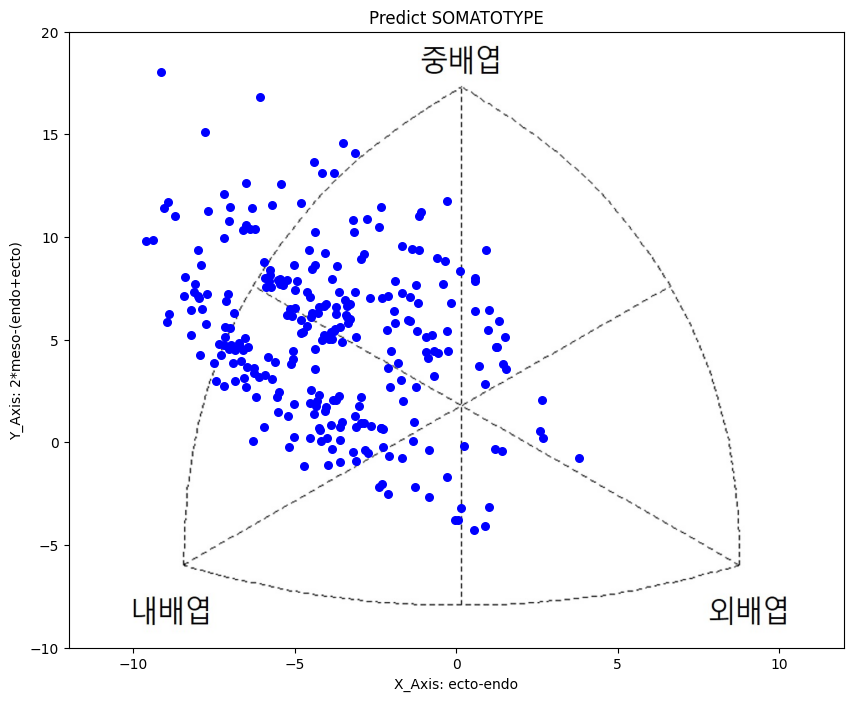

In [13]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
x_axis = data['ecto'] - data['endo']
y_axis = 2 * data['meso'] - (data['endo'] + data['ecto'])
plt.figure(figsize=(10, 8))# 그래프 설정
plt.scatter(x_axis, y_axis, color='blue', s=30)
plt.xlabel('X_Axis: ecto-endo')
plt.ylabel('Y_Axis: 2*meso-(endo+ecto)')
plt.title('Predict SOMATOTYPE')
plt.grid(False)
plt.xlim(-12, 12)  # x축 범위
plt.ylim(-10, 20)  # y축 범위
img = mpimg.imread('somato_chart.jpg')
plt.imshow(img, extent=[-12, 12, -10, 20], aspect='auto')
plt.show()  # 그래프 표시